In [1]:
from pathlib import Path

THIS = Path(".")
BASE = THIS / ".."
BASE = BASE.absolute().resolve()

MODEL = BASE / "model"
EXPORTS = BASE / "exports"

MODEL_NAME="Llama-2-7b-hf"



MODEL_PATH = MODEL / MODEL_NAME
EXPORTS = EXPORTS / MODEL_NAME

## Engine

### Llamacpp

In [2]:
METHOD = "engine/llamacpp"
METHOD_EXPORTS = EXPORTS / METHOD

In [3]:
# print paths
print("BASE:", BASE)
print("MODEL:", MODEL)
print("MODEL_PATH:", MODEL_PATH)
print("METHOD_EXPORTS:", METHOD_EXPORTS)


BASE: /home/shwu/LLM-Efficiency-Survey
MODEL: /home/shwu/LLM-Efficiency-Survey/model
MODEL_PATH: /home/shwu/LLM-Efficiency-Survey/model/Llama-2-7b-hf
METHOD_EXPORTS: /home/shwu/LLM-Efficiency-Survey/exports/Llama-2-7b-hf/engine/llamacpp


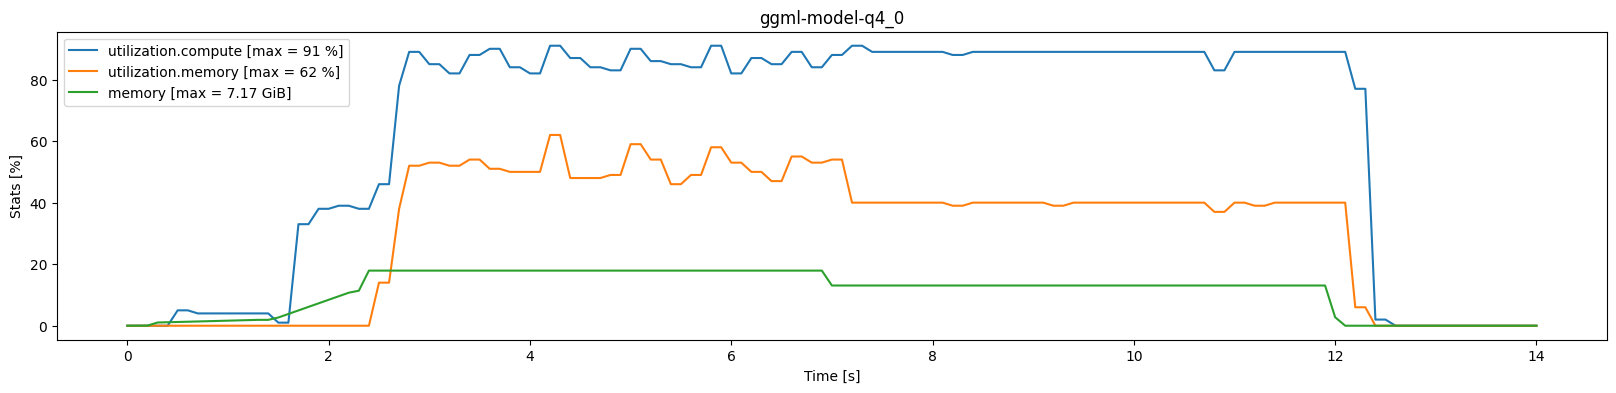

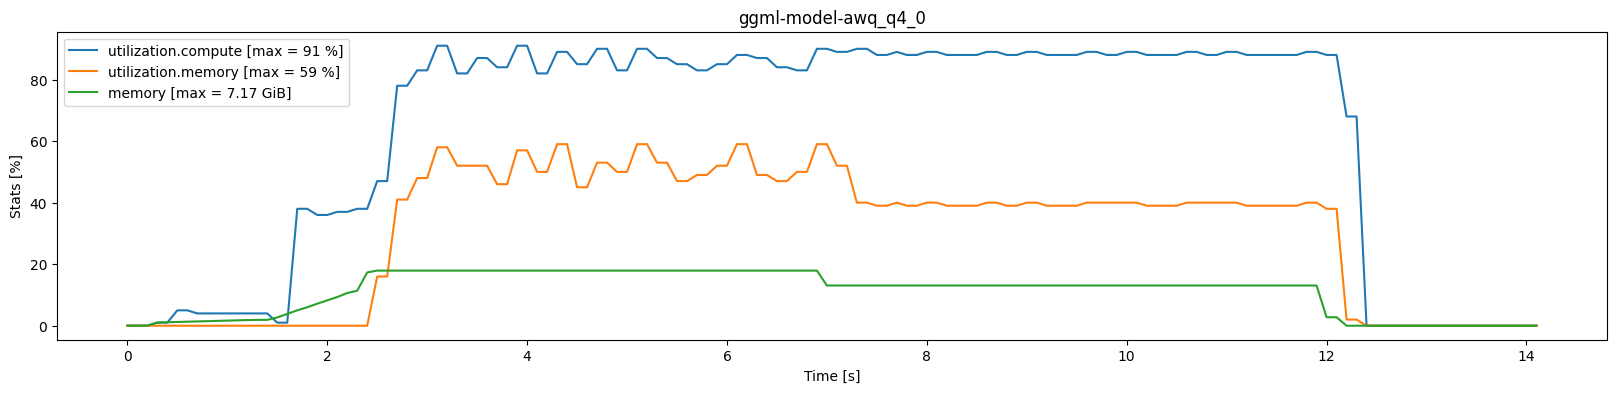

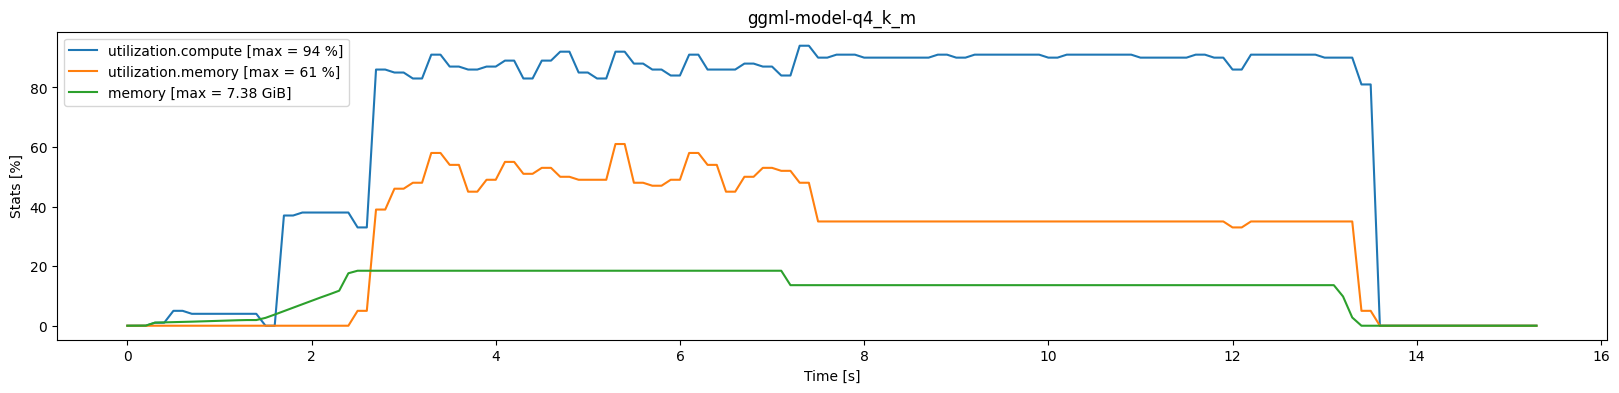

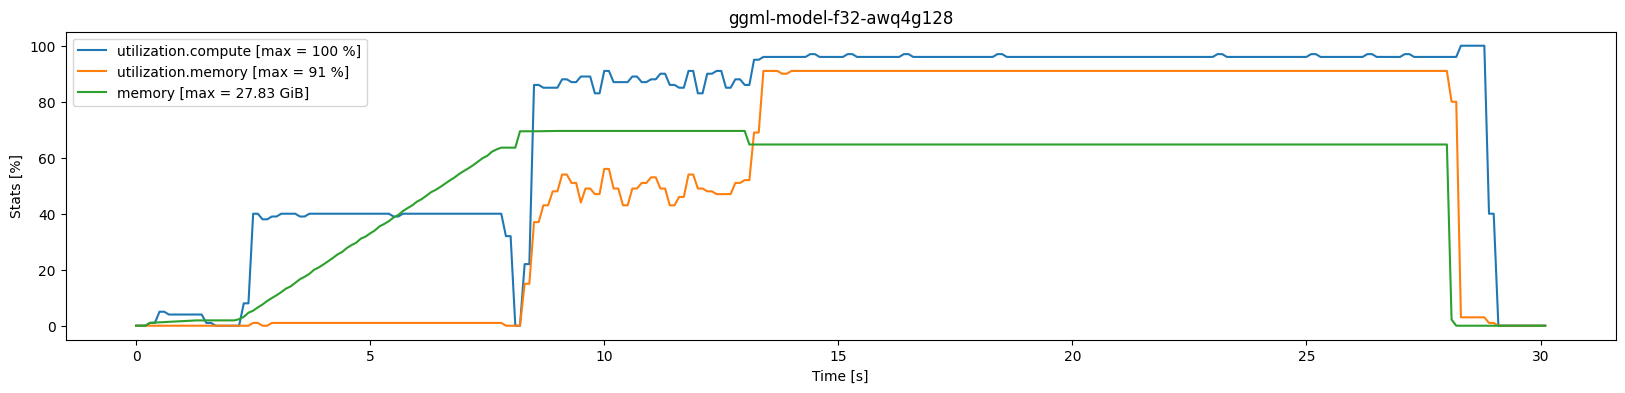

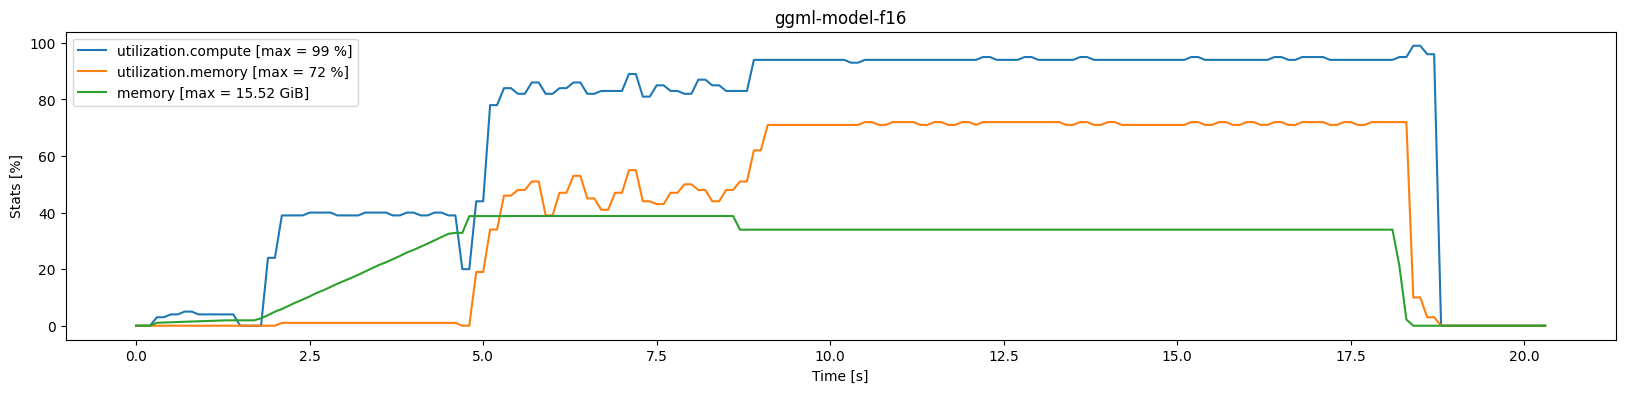

In [47]:
# max mem usage
import pandas as pd
import matplotlib.pyplot as plt
all_csvs = list(METHOD_EXPORTS.glob("*.csv"))

# csv header
# utilization.gpu [%], utilization.memory [%], memory.used [MiB], memory.free [MiB], memory.total [MiB]
utlization_gpu_key = "utilization.gpu [%]"
utilization_memory_key = " " + "utilization.memory [%]"
memory_used_key = " " + "memory.used [MiB]"
memory_free_key = " " + "memory.free [MiB]"
memory_total_key = " " + "memory.total [MiB]"

for csv in all_csvs:
    if not "bench" in csv.name:
        continue
    df = pd.read_csv(csv)

    # plot csv of utilization.memory [%] and utilization.gpu [%] both on y-axis
    fig, ax1 = plt.subplots(figsize=(20, 4))
    plt.title(csv.name.split('usage')[-1][1:-4])
    ax1.set_ylabel("Stats [%]")
    ax1.set_xlabel("Time [s]")
    ax1.plot(df.index * 0.1, df[utlization_gpu_key], label=f"utilization.compute [max = {df[utlization_gpu_key].max()} %]")
    ax1.plot(df.index * 0.1, df[utilization_memory_key], label=f"utilization.memory [max = {df[utilization_memory_key].max()} %]")
    ax1.plot(df.index * 0.1, (df[memory_used_key] / df[memory_total_key]) * 100, label=f"memory [max = {df[memory_used_key].max() / 1024:.2f} GiB]")
    ax1.legend(loc="upper left")

    # set title
    

In [21]:
# benchmark logs
all_logs = list(METHOD_EXPORTS.glob("*.log"))

for log in all_logs:
    if not "bench" in log.name:
        continue
    print(f"{log.name.split('ggml')[-1][1:-4]}:")
    with open(log) as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("|"):
                print(line, end="")
    print()

model-q4_0:
| model                          |       size |     params | backend    | ngl | test       |              t/s |
| ------------------------------ | ---------: | ---------: | ---------- | --: | ---------- | ---------------: |
| llama 7B Q4_0                  |   3.56 GiB |     6.74 B | CUDA       |  99 | pp 3968    |  4248.94 ± 90.42 |
| llama 7B Q4_0                  |   3.56 GiB |     6.74 B | CUDA       |  99 | tg 128     |    126.76 ± 0.68 |

model-f32-awq4g128:
| model                          |       size |     params | backend    | ngl | test       |              t/s |
| ------------------------------ | ---------: | ---------: | ---------- | --: | ---------- | ---------------: |
| llama 7B all F32               |  25.10 GiB |     6.74 B | CUDA       |  99 | pp 3968    |  4026.75 ± 95.57 |
| llama 7B all F32               |  25.10 GiB |     6.74 B | CUDA       |  99 | tg 128     |     42.25 ± 0.01 |

model-awq_q4_0:
| model                          |       size |     pa